# Problem Statement

## Load Dataset

Sapa.com is one of the leading eCommerce platforms in Nigeria with millions of daily complete transactions. The goods and services on sapa.com cater for both the elite and the masses which makes it the first choice for almost everybody in Nigeria. Due to the COVID-19 pandemic that struck the entire world in all areas of living, the companies' daily complete transactions have dropped drastically to thousands.

The CEO, Mr Echoke in his recent actions to put the platform back to the top of the eCommerce platforms chain in the country has approved the use of Artificial intelligence in User Personality Analysis. The company has contracted your team consisting of AI professionals with a special focus on recommender system development to build a robust intelligent model capable of recommending products and services to Users based on their activities on sapa.com.

Your team lead has assigned you to the building of a model capable of predicting users’ responses to marketing campaigns based on the features in the provided dataset by the sapa.com data engineer. The next phase of the project is highly dependent on the accuracy of your model as this is the foundation of what will constitute the features of the proposed recommender system development. Good luck!



## Import Libraries


In [ ]:
import pandas as pd
import numpy as np
pd.set_option ('max_columns', None)
pd.set_option ('max_rows', 100)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('whitegrid')

from datetime import datetime
from dateutil.parser import parse
# when using Scikit-Learn's Imputer class
from sklearn.impute import SimpleImputer
from sklearn import preprocessing

from sklearn.preprocessing import LabelEncoder

from sklearn.neighbors import KNeighborsRegressor
import scipy.stats

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.utils import resample
from sklearn.pipeline import Pipeline


In [ ]:
sns.set_style('dark')    # set the style
sns.set_context ('paper')     # set the scale

## Load Dataset

In [ ]:
train= ('/content/Train.csv')
test= ('/content/Test.csv')
sample_file=('/content/SampleSubmission.csv') 

In [ ]:
df=pd.read_csv(train)
final_test=pd.read_csv(test)
sample_submission= pd.read_csv(sample_file)

In [ ]:
df.head()

,ID,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response
0,ID_4A9AR6FQ,1955,Graduation,Divorced,77504.4,1,1,22-06-2014,56,2,1,1,4,71,3,16,0,6,20,3,0,0,0,0,0,0,0
1,ID_X28T3VEK,1958,Graduation,Together,56784.0,0,1,01-08-2013,17,6,5,1,8,205,22,111,50,15,19,6,0,0,0,0,0,0,0
2,ID_AWXARH57,1962,Graduation,Single,103714.8,0,0,21-11-2013,17,0,7,4,7,469,31,873,29,18,37,2,0,0,0,1,0,0,1
3,ID_FQVZHE81,1979,2n Cycle,Single,46311.6,1,0,13-09-2013,49,3,4,1,3,56,15,49,17,24,24,8,0,0,0,0,0,0,0
4,ID_QVLWGPRN,1959,Graduation,Married,87486.0,0,0,21-01-2014,59,1,3,7,9,412,117,445,181,165,203,1,0,0,0,1,0,0,0


In [ ]:
final_test.head()

,ID,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain
0,ID_ZPMABNVX,1954,Graduation,Single,48556.8,0,1,11-01-2013,85,6,8,2,8,429,20,118,7,23,41,8,0,0,0,0,0,0
1,ID_WFE91NAA,1961,Graduation,Widow,57499.2,0,1,22-11-2012,79,5,7,4,6,510,3,26,0,0,75,6,0,1,0,0,0,0
2,ID_JV11RBRK,1973,Basic,Married,17025.6,0,0,28-02-2013,47,1,2,0,4,7,10,11,16,12,27,6,0,0,0,0,0,0
3,ID_6B7SVKY9,1970,Graduation,Together,91983.6,0,0,16-08-2013,98,1,4,7,11,741,66,946,219,189,126,2,0,0,1,1,0,0
4,ID_GOVUZ545,1959,Graduation,Together,78235.2,0,2,25-07-2013,41,2,7,6,11,748,22,181,12,0,200,5,1,0,0,0,0,0


In [ ]:
sample_submission.head()

,ID,Response
0,ID_ZPMABNVX,NaN
1,ID_WFE91NAA,NaN
2,ID_JV11RBRK,NaN
3,ID_6B7SVKY9,NaN
4,ID_GOVUZ545,NaN


In [ ]:
df.shape

(1568, 27)

In [ ]:
final_test.shape

(672, 26)

### Identify the target column

In [ ]:
target = [col for col in df.columns if col not in final_test.columns]
target

['Response']

In [ ]:
df1=df.copy()

In [ ]:
ft1 =final_test.copy()

## Convert Data To Datetine Object

In [ ]:
df1['Date_Customer'] = pd.to_datetime(df1['Date_Customer'])


In [ ]:
ft1['Date_Customer'] = pd.to_datetime(ft1['Date_Customer'])


## Create two extra columns from the Date_Customer 
- Day of the week
- Weekday


In [ ]:
df1['Year']=  df1['Date_Customer'].dt.year

In [ ]:
ft1['Year']=  ft1['Date_Customer'].dt.year

In [ ]:
df1['month']=  df1['Date_Customer'].dt.month

In [ ]:
ft1['month']=  ft1['Date_Customer'].dt.month

In [ ]:
df1['DayofWeek'] = df1['Date_Customer'].dt.dayofweek


In [ ]:
ft1['DayofWeek'] = ft1['Date_Customer'].dt.dayofweek


In [ ]:
df1['DayName'] = df['Date_Customer'].apply(lambda x: parse(str(x)).strftime("%A"))

In [ ]:
ft1['DayName'] = ft1['Date_Customer'].apply(lambda x: parse(str(x)).strftime("%A"))

In [ ]:
#Drop ID from train and test
df1.drop('ID', axis=1, inplace=True)

In [ ]:
#Drop ID from train and test
ft1.drop('ID', axis=1, inplace=True)

In [ ]:
df1.head(10).transpose()

,0,1,2,3,4,5,6,7,8,9
Year_of_Birth,1955,1958,1962,1979,1959,1960,1953,1974,1966,1975
Education_Level,Graduation,Graduation,Graduation,2n Cycle,Graduation,Master,Graduation,Graduation,Graduation,Graduation
Marital_Status,Divorced,Together,Single,Single,Married,Married,Single,Together,Together,Married
Disposable_Income,77504.4,56784,103715,46311.6,87486,41090.4,86673.6,88711.2,35606.4,41305.2
No_of_Kids_in_home,1,0,0,1,0,0,0,0,1,1
No_of_Teen_in_home,1,1,0,0,0,1,0,0,1,0
Date_Customer,2014-06-22 00:00:00,2013-01-08 00:00:00,2013-11-21 00:00:00,2013-09-13 00:00:00,2014-01-21 00:00:00,2014-03-23 00:00:00,2012-11-27 00:00:00,2013-02-03 00:00:00,2013-12-03 00:00:00,2013-01-07 00:00:00
Recency,56,17,17,49,59,32,94,61,13,88
Discounted_Purchases,2,6,0,3,1,1,1,1,1,1
WebPurchases,1,5,7,4,3,0,6,6,0,1


In [ ]:

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1568 entries, 0 to 1567
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Year_of_Birth            1568 non-null   int64         
 1   Education_Level          1568 non-null   object        
 2   Marital_Status           1568 non-null   object        
 3   Disposable_Income        1552 non-null   float64       
 4   No_of_Kids_in_home       1568 non-null   int64         
 5   No_of_Teen_in_home       1568 non-null   int64         
 6   Date_Customer            1568 non-null   datetime64[ns]
 7   Recency                  1568 non-null   int64         
 8   Discounted_Purchases     1568 non-null   int64         
 9   WebPurchases             1568 non-null   int64         
 10  CatalogPurchases         1568 non-null   int64         
 11  StorePurchases           1568 non-null   int64         
 12  Amount_on_Wines          1568 non-

### There are 30 features in total.

- object type = 3 features
- datetime= 1
- int/float = 26


In [ ]:
ft1.shape

(672, 29)

29 columns sinec the target column is missing there

In [ ]:
df1.describe()

,Year_of_Birth,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response,Year,month,DayofWeek
count,1568.000000,1552.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000
mean,1970.073342,62381.186598,0.460459,0.497449,55.408801,2.292730,4.001276,2.665816,5.703444,303.190051,29.091199,168.376276,37.166454,26.800383,43.739158,5.326531,0.072704,0.072704,0.080357,0.064413,0.012755,0.008291,0.152423,2013.019133,6.568878,3.087372
std,11.920781,32089.169563,0.540361,0.544151,28.788037,1.937544,2.773748,3.043493,3.260553,340.141396,39.565637,233.419980,53.994951,40.857657,51.591557,2.468023,0.259733,0.259733,0.271932,0.245566,0.112252,0.090705,0.359546,0.685070,3.518441,2.018585
min,1900.000000,2076.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,5.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2012.000000,1.000000,0.000000
25%,1960.000000,41612.400000,0.000000,0.000000,31.000000,1.000000,2.000000,0.000000,3.000000,27.000000,4.000000,15.000000,3.000000,1.000000,8.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.000000,3.000000,1.000000
50%,1971.000000,60964.200000,0.000000,0.000000,56.000000,2.000000,3.000000,2.000000,5.000000,167.000000,11.000000,64.000000,12.000000,8.000000,25.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.000000,7.000000,3.000000
75%,1979.000000,81493.200000,1.000000,1.000000,80.000000,3.000000,6.000000,4.000000,8.000000,499.500000,36.000000,232.000000,49.250000,33.000000,56.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.000000,10.000000,5.000000
max,1997.000000,799999.200000,2.000000,2.000000,106.000000,15.000000,27.000000,28.000000,13.000000,1498.000000,202.000000,1725.000000,259.000000,263.000000,362.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2014.000000,12.000000,6.000000


## Understanding the Features in the Dataset


### Let's have a look at the Target Column

In [ ]:
df1['Response'].value_counts()

0    1329
1     239
Name: Response, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


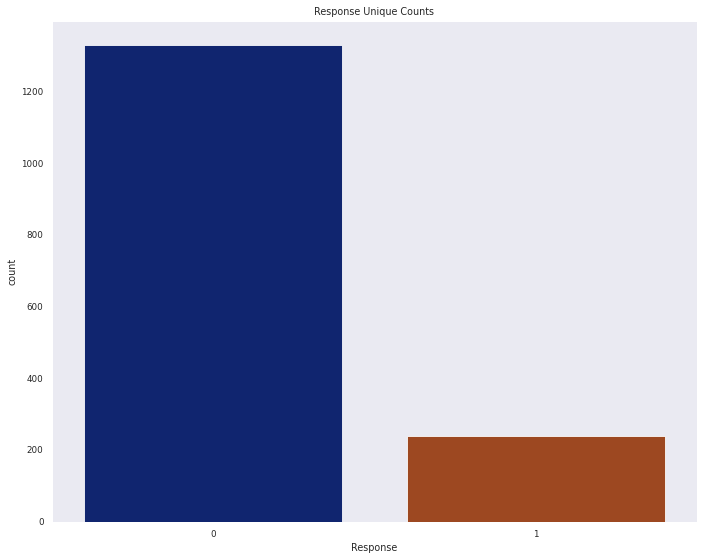

In [ ]:
plt.figure (figsize= (10,8), tight_layout= True)
plt.title ('Response Unique Counts')
plt.rc('grid', c ='r', ls ='-', lw = 0.5)  # gridstyle
plt.rc('axes', titlesize=18)               # axes title fontsize
plt.rc('axes', labelsize=14)               # x and y labels fontsize
plt.rc('xtick', labelsize=14)              # fontsize of the tick labels
plt.rc('ytick', labelsize=14)              # fontsize of the tick labels
plt.rc('legend', fontsize=14)              # legend fontsize
plt.rc('font', size=14)                    # modify text sizes
sns.countplot(df1['Response'], label = 'counts', palette= 'dark' )
plt.show()


### The unique values in the target column does not seem balanced. We can consider Upsampling after splitting the data

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


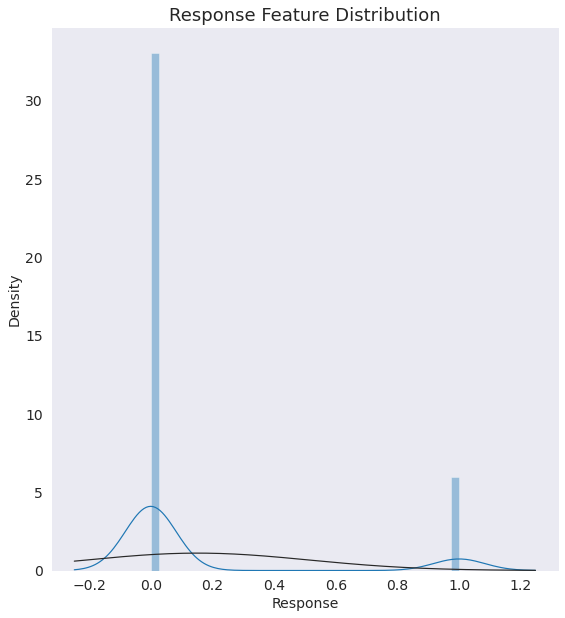

In [ ]:
plt.figure(figsize=(20, 10))
plt.subplot(1,2, 1)
plt.title('Response Feature Distribution')
plt.xlabel= ('Price_doc')
sns.distplot(df1['Response'], kde= True, fit= scipy.stats.norm)

plt.show()

In [ ]:
corr= df1.corr()
val= corr ['Response'].sort_values(ascending=False)
val.head(20)

Response                   1.000000
Cmp5Accepted               0.357647
Cmp1Accepted               0.344083
Amount_on_Wines            0.259173
Cmp3Accepted               0.257106
Amount_on_MeatProducts     0.247182
CatalogPurchases           0.221534
Cmp4Accepted               0.202437
Amount_on_GoldProds        0.174229
WebPurchases               0.165538
Cmp2Accepted               0.157353
Amount_on_Fruits           0.155225
Amount_on_SweetProducts    0.133005
Disposable_Income          0.130254
Amount_on_FishProducts     0.129884
StorePurchases             0.061446
month                      0.023729
Year_of_Birth              0.012279
Discounted_Purchases       0.000951
Any_Complain              -0.019206
Name: Response, dtype: float64

## The correction matrix above indicates the realtonship between the features and the  Response column.

### The following features are the top 7 features that correlates with the target variable.

- Cmp5Accepted              
- Cmp1Accepted               
- Amount_on_Wines          
- Cmp3Accepted              
- Amount_on_MeatProducts     
- CatalogPurchases           
- Cmp4Accepted               

- we can plot a heatmap to see this visually.

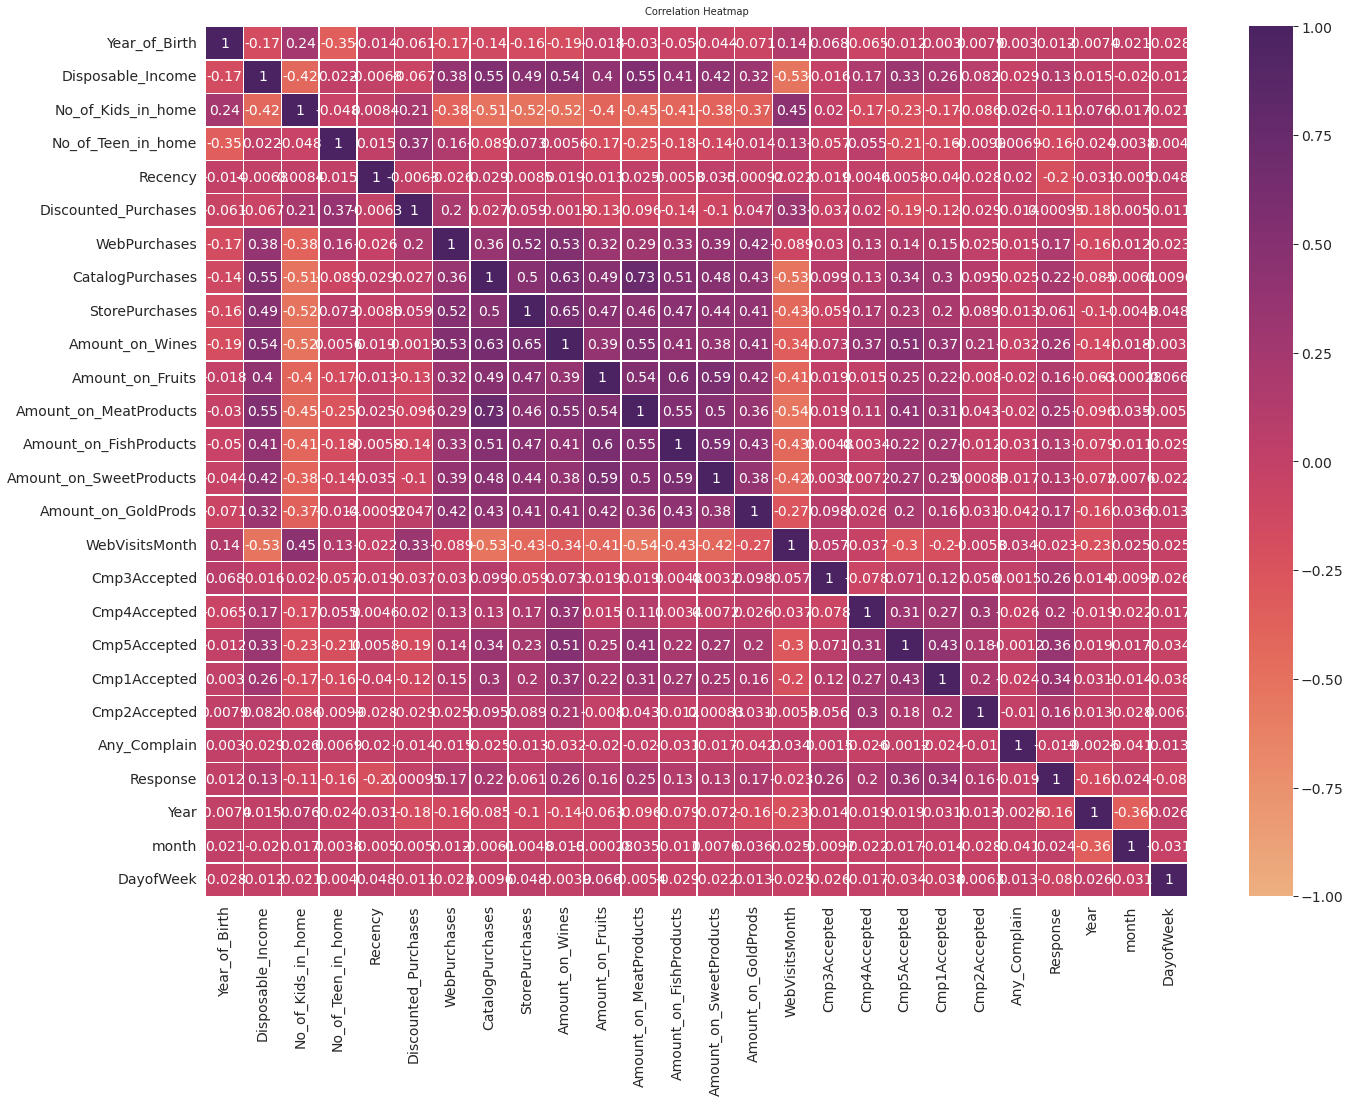

In [ ]:
plt.figure(figsize=(22, 16))
heatmap = sns.heatmap(df1.corr(), vmin=-1, vmax=1, annot=True, linewidth= 0.5, cmap= 'flare') ### checking the correlation between the features
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':10}, pad=12);
plt.show()

## UNIVARIATE ANALYSIS

## Check for Skewness

In [ ]:
scipy.stats.skew (df1['Cmp5Accepted'])

3.0873650715814516

In [ ]:
scipy.stats.skew (ft1['Cmp5Accepted'])

3.9013369347824347

### This feature is obviously right skewed (vale> 0.5)

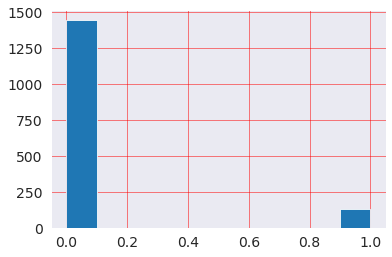

In [ ]:
df1['Cmp5Accepted'].hist()

### Do I need to upsample this feature?

In [ ]:
df1.isna().sum()

Year_of_Birth               0
Education_Level             0
Marital_Status              0
Disposable_Income          16
No_of_Kids_in_home          0
No_of_Teen_in_home          0
Date_Customer               0
Recency                     0
Discounted_Purchases        0
WebPurchases                0
CatalogPurchases            0
StorePurchases              0
Amount_on_Wines             0
Amount_on_Fruits            0
Amount_on_MeatProducts      0
Amount_on_FishProducts      0
Amount_on_SweetProducts     0
Amount_on_GoldProds         0
WebVisitsMonth              0
Cmp3Accepted                0
Cmp4Accepted                0
Cmp5Accepted                0
Cmp1Accepted                0
Cmp2Accepted                0
Any_Complain                0
Response                    0
Year                        0
month                       0
DayofWeek                   0
DayName                     0
dtype: int64

In [ ]:
ft1.isna().sum()

Year_of_Birth              0
Education_Level            0
Marital_Status             0
Disposable_Income          8
No_of_Kids_in_home         0
No_of_Teen_in_home         0
Date_Customer              0
Recency                    0
Discounted_Purchases       0
WebPurchases               0
CatalogPurchases           0
StorePurchases             0
Amount_on_Wines            0
Amount_on_Fruits           0
Amount_on_MeatProducts     0
Amount_on_FishProducts     0
Amount_on_SweetProducts    0
Amount_on_GoldProds        0
WebVisitsMonth             0
Cmp3Accepted               0
Cmp4Accepted               0
Cmp5Accepted               0
Cmp1Accepted               0
Cmp2Accepted               0
Any_Complain               0
Year                       0
month                      0
DayofWeek                  0
DayName                    0
dtype: int64

In [ ]:
df['Disposable_Income'].head(10)

0     77504.4
1     56784.0
2    103714.8
3     46311.6
4     87486.0
5     41090.4
6     86673.6
7     88711.2
8     35606.4
9     41305.2
Name: Disposable_Income, dtype: float64

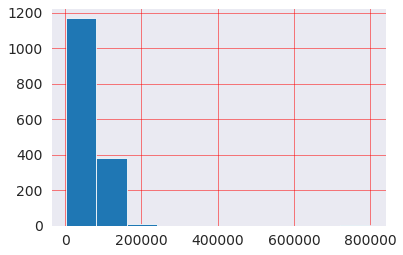

In [ ]:
# median income looks like an imp feature

df1['Disposable_Income'].hist()

In [ ]:
df2=df1.copy()

In [ ]:
ft2= ft1.copy()

In [ ]:
df2['Disposable_Income'].fillna((df2['Disposable_Income'].mean()) , inplace = True)
#check again to make sure
df2.isnull().sum()

Year_of_Birth              0
Education_Level            0
Marital_Status             0
Disposable_Income          0
No_of_Kids_in_home         0
No_of_Teen_in_home         0
Date_Customer              0
Recency                    0
Discounted_Purchases       0
WebPurchases               0
CatalogPurchases           0
StorePurchases             0
Amount_on_Wines            0
Amount_on_Fruits           0
Amount_on_MeatProducts     0
Amount_on_FishProducts     0
Amount_on_SweetProducts    0
Amount_on_GoldProds        0
WebVisitsMonth             0
Cmp3Accepted               0
Cmp4Accepted               0
Cmp5Accepted               0
Cmp1Accepted               0
Cmp2Accepted               0
Any_Complain               0
Response                   0
Year                       0
month                      0
DayofWeek                  0
DayName                    0
dtype: int64

In [ ]:
ft2['Disposable_Income'].fillna((df2['Disposable_Income'].mean()) , inplace = True)
#check again to make sure
ft2.isnull().sum()

Year_of_Birth              0
Education_Level            0
Marital_Status             0
Disposable_Income          0
No_of_Kids_in_home         0
No_of_Teen_in_home         0
Date_Customer              0
Recency                    0
Discounted_Purchases       0
WebPurchases               0
CatalogPurchases           0
StorePurchases             0
Amount_on_Wines            0
Amount_on_Fruits           0
Amount_on_MeatProducts     0
Amount_on_FishProducts     0
Amount_on_SweetProducts    0
Amount_on_GoldProds        0
WebVisitsMonth             0
Cmp3Accepted               0
Cmp4Accepted               0
Cmp5Accepted               0
Cmp1Accepted               0
Cmp2Accepted               0
Any_Complain               0
Year                       0
month                      0
DayofWeek                  0
DayName                    0
dtype: int64

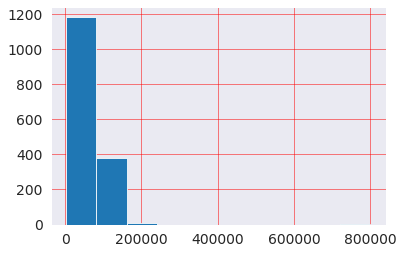

In [ ]:
# median income looks like an imp feature

df2['Disposable_Income'].hist()

# Feature Engineering

- From year of birth, create user's age
- From Year, create User_Enrolment_Duration
- 

In [ ]:
 df2['User_Age'] = 2021-df2['Year_of_Birth']

In [ ]:
 ft2['User_Age'] = 2021-ft2['Year_of_Birth']

In [ ]:
df2['User_Enrolment_Duration']= 2021-df2['Year']

In [ ]:
ft2['User_Enrolment_Duration']= 2021-ft2['Year']

In [ ]:
df2.head(10).transpose()

,0,1,2,3,4,5,6,7,8,9
Year_of_Birth,1955,1958,1962,1979,1959,1960,1953,1974,1966,1975
Education_Level,Graduation,Graduation,Graduation,2n Cycle,Graduation,Master,Graduation,Graduation,Graduation,Graduation
Marital_Status,Divorced,Together,Single,Single,Married,Married,Single,Together,Together,Married
Disposable_Income,77504.4,56784,103715,46311.6,87486,41090.4,86673.6,88711.2,35606.4,41305.2
No_of_Kids_in_home,1,0,0,1,0,0,0,0,1,1
No_of_Teen_in_home,1,1,0,0,0,1,0,0,1,0
Date_Customer,2014-06-22 00:00:00,2013-01-08 00:00:00,2013-11-21 00:00:00,2013-09-13 00:00:00,2014-01-21 00:00:00,2014-03-23 00:00:00,2012-11-27 00:00:00,2013-02-03 00:00:00,2013-12-03 00:00:00,2013-01-07 00:00:00
Recency,56,17,17,49,59,32,94,61,13,88
Discounted_Purchases,2,6,0,3,1,1,1,1,1,1
WebPurchases,1,5,7,4,3,0,6,6,0,1


In [ ]:
df2.shape

(1568, 32)

- After some feature engineering, we have 32 columns in total

## Feature Selection

In [ ]:
df3=df2.copy()

In [ ]:
ft3= ft2.copy()

In [ ]:
df3.drop(['Year_of_Birth','Date_Customer', 'DayName'], axis=1, inplace= True)

In [ ]:
ft3.drop(['Year_of_Birth', 'Date_Customer', 'DayName'], axis=1, inplace= True)

In [ ]:
df4= df3.copy()

In [ ]:
ft4= ft3.copy()

## Skewness


- view_skew returns all the columns that have skew values > 0.5, hence we need to trasform them.

## TRANSFORMATION OPTIONS
- logtransform
- Stratified Sampling
- Normalization


In [ ]:
skew_df= pd.DataFrame (df4.select_dtypes(np.number).columns, columns=['Num_Features'])
skew_df ['Skew_Values']= skew_df['Num_Features'].apply(lambda feature:scipy.stats.skew(df4[feature]))
skew_df['Abs_Skew']= skew_df['Skew_Values'].apply(abs)
skew_df['Skewed']= skew_df['Skew_Values'].apply (lambda x : True if x >=0.5 else False)
#skew_df ['Feat_Correlation'] =skew_df['Num_Features'].apply(lambda feature : corr['price_doc'].sort_values(ascending=False))
 

In [ ]:
skew_dft= pd.DataFrame (ft4.select_dtypes(np.number).columns, columns=['Num_Features'])
skew_dft ['Skew_Values']= skew_dft['Num_Features'].apply(lambda feature:scipy.stats.skew(ft4[feature]))
skew_dft['Abs_Skew']= skew_dft['Skew_Values'].apply(abs)
skew_dft['Skewed']= skew_dft['Skew_Values'].apply (lambda x : True if x >=0.5 else False) 

In [ ]:
view_skew= skew_df.query ('Skewed == True')['Num_Features']
view_skew.head(10)


0          Disposable_Income
1         No_of_Kids_in_home
4       Discounted_Purchases
5               WebPurchases
6           CatalogPurchases
7             StorePurchases
8            Amount_on_Wines
9           Amount_on_Fruits
10    Amount_on_MeatProducts
11    Amount_on_FishProducts
Name: Num_Features, dtype: object

In [ ]:
view_skewt= skew_dft.query ('Skewed == True')['Num_Features']
view_skewt.head(10)


1          No_of_Kids_in_home
4        Discounted_Purchases
5                WebPurchases
6            CatalogPurchases
7              StorePurchases
8             Amount_on_Wines
9            Amount_on_Fruits
10     Amount_on_MeatProducts
11     Amount_on_FishProducts
12    Amount_on_SweetProducts
Name: Num_Features, dtype: object

In [ ]:
#df4[skew_df.query ('Skewed == True')['Num_Features'].values].describe()

In [ ]:
#ft4[skew_dft.query ('Skewed == True')['Num_Features'].values].describe()

## Recheck Skew Values

In [ ]:
df4.head(5)

,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response,Year,month,DayofWeek,User_Age,User_Enrolment_Duration
0,Graduation,Divorced,77504.4,1,1,56,2,1,1,4,71,3,16,0,6,20,3,0,0,0,0,0,0,0,2014,6,6,66,7
1,Graduation,Together,56784.0,0,1,17,6,5,1,8,205,22,111,50,15,19,6,0,0,0,0,0,0,0,2013,1,1,63,8
2,Graduation,Single,103714.8,0,0,17,0,7,4,7,469,31,873,29,18,37,2,0,0,0,1,0,0,1,2013,11,3,59,8
3,2n Cycle,Single,46311.6,1,0,49,3,4,1,3,56,15,49,17,24,24,8,0,0,0,0,0,0,0,2013,9,4,42,8
4,Graduation,Married,87486.0,0,0,59,1,3,7,9,412,117,445,181,165,203,1,0,0,0,1,0,0,0,2014,1,1,62,7


In [ ]:
#for column in skew_df.query('Skewed == True')['Num_Features'].values:
  #df4[column]=np.log1p(df4[column])

In [ ]:
#for column in skew_dft.query('Skewed == True')['Num_Features'].values:
  #ft4[column]=np.log1p(ft4[column])

In [ ]:
skew_df= pd.DataFrame (df4.select_dtypes(np.number).columns, columns=['Num_Features'])
skew_df ['Skew_Values']= skew_df['Num_Features'].apply(lambda feature:scipy.stats.skew(df4[feature]))
skew_df['Abs_Skew']= skew_df['Skew_Values'].apply(abs)
skew_df['Skewed']= skew_df['Skew_Values'].apply (lambda x : True if x >=0.5 else False)


In [ ]:
skew_df.head(10)

,Num_Features,Skew_Values,Abs_Skew,Skewed
0,Disposable_Income,8.074011,8.074011,True
1,No_of_Kids_in_home,0.569959,0.569959,True
2,No_of_Teen_in_home,0.437999,0.437999,False
3,Recency,0.009751,0.009751,False
4,Discounted_Purchases,2.618132,2.618132,True
5,WebPurchases,1.492324,1.492324,True
6,CatalogPurchases,2.094984,2.094984,True
7,StorePurchases,0.734964,0.734964,True
8,Amount_on_Wines,1.218958,1.218958,True
9,Amount_on_Fruits,2.070500,2.070500,True


In [ ]:
skew_dft= pd.DataFrame (ft4.select_dtypes(np.number).columns, columns=['Num_Features'])
skew_dft ['Skew_Values']= skew_dft['Num_Features'].apply(lambda feature:scipy.stats.skew(ft4[feature]))
skew_dft['Abs_Skew']= skew_dft['Skew_Values'].apply(abs)
skew_dft['Skewed']= skew_dft['Skew_Values'].apply (lambda x : True if x >=0.5 else False) 
skew_dft.head()

,Num_Features,Skew_Values,Abs_Skew,Skewed
0,Disposable_Income,0.153227,0.153227,False
1,No_of_Kids_in_home,0.793913,0.793913,True
2,No_of_Teen_in_home,0.335322,0.335322,False
3,Recency,-0.033989,0.033989,False
4,Discounted_Purchases,1.943371,1.943371,True


In [ ]:
df4.head(10)

,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response,Year,month,DayofWeek,User_Age,User_Enrolment_Duration
0,Graduation,Divorced,77504.4,1,1,56,2,1,1,4,71,3,16,0,6,20,3,0,0,0,0,0,0,0,2014,6,6,66,7
1,Graduation,Together,56784.0,0,1,17,6,5,1,8,205,22,111,50,15,19,6,0,0,0,0,0,0,0,2013,1,1,63,8
2,Graduation,Single,103714.8,0,0,17,0,7,4,7,469,31,873,29,18,37,2,0,0,0,1,0,0,1,2013,11,3,59,8
3,2n Cycle,Single,46311.6,1,0,49,3,4,1,3,56,15,49,17,24,24,8,0,0,0,0,0,0,0,2013,9,4,42,8
4,Graduation,Married,87486.0,0,0,59,1,3,7,9,412,117,445,181,165,203,1,0,0,0,1,0,0,0,2014,1,1,62,7
5,Master,Married,41090.4,0,1,32,1,0,0,3,13,5,4,0,0,1,5,0,0,0,0,0,0,0,2014,3,6,61,7
6,Graduation,Single,86673.6,0,0,94,1,6,7,8,636,31,491,30,14,56,3,0,0,0,0,0,0,0,2012,11,1,68,9
7,Graduation,Together,88711.2,0,0,61,1,6,5,12,632,94,597,159,91,15,3,0,0,0,0,0,0,0,2013,2,6,47,8
8,Graduation,Together,35606.4,1,1,13,1,0,0,3,14,4,3,0,4,8,6,0,0,0,0,0,0,0,2013,12,1,55,8
9,Graduation,Married,41305.2,1,0,88,1,1,0,2,8,6,7,6,2,9,7,0,0,0,0,0,0,0,2013,1,0,46,8


# Encoding

In [ ]:
le_edu= LabelEncoder()
df4['Education_Level'] = le_edu.fit_transform(df4['Education_Level'])

le_mar= LabelEncoder()
df4['Marital_Status'] = le_mar.fit_transform(df4['Marital_Status'])

In [ ]:
ft4['Education_Level']= le_edu.transform(ft4['Education_Level'])
ft4['Marital_Status']= le_mar.transform(ft4['Marital_Status'])

In [ ]:
#pip install category_encoders

In [ ]:
#ce_target = ce.BaseNEncoder(cols = ['Marital_Status', 'Education_Level'],base=4)
#df4= ce_target.fit_transform(df4)

In [ ]:
#ft4=ce_target.transform(ft4)

In [ ]:
#import category_encoders as ce

#ce_one = ce.OneHotEncoder(cols = [col=['Marital_Status', 'Education_Level'])
#df4= ce_one.fit_transform(df4)

In [ ]:
#ft4= ce_one.fit_transform(ft4)

In [ ]:
####instantitiate standard scaler.

#scaler = StandardScaler()
#df4= scaler.fit_transform(df4)

In [ ]:
#ft4 = scaler.fit_transform(ft4)

# Target Upsampling

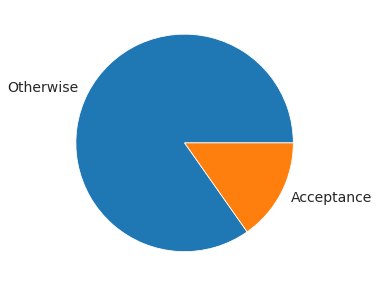

In [ ]:
plt.figure(figsize=(5,5))
plt.pie(df3.Response.value_counts(),labels=['Otherwise', 'Acceptance'])
plt.show()

In [ ]:
# Separate majority and minority classes
df_majority = df4[df4.Response==0]
df_minority = df4[df4.Response==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=df_majority.shape[0],    # to match majority class
                                 random_state=42) # reproducible results
 

In [ ]:
# Combine majority class with upsampled minority class

df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 


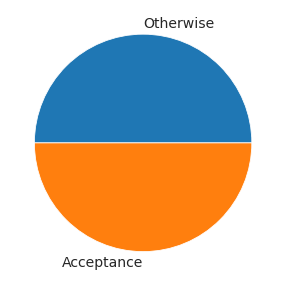

In [ ]:
plt.figure(figsize=(5,5))
plt.pie(df_upsampled.Response.value_counts(),labels=['Otherwise', 'Acceptance'])
plt.show()

# Split Data Into Test and Train

In [ ]:
#set x and y

y = df_upsampled.Response
x= df_upsampled.drop('Response', axis=1)

#split into train and test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [ ]:
x_train.shape

(2126, 28)

In [ ]:
x_test.shape

(532, 28)

# Feature Transformation

- Encoding
- Standard Scaler/ Normalization


## Encoding Categorical Variables

- Marital_Status
- Education_Level

- To avoid ordinal problems , I will use OneHotEncoder

In [ ]:
#le_edu= LabelEncoder()
#x_train['Education_Level'] = le_edu.fit_transform(x_train['Education_Level'])

#le_mar= LabelEncoder()
#x_train[''] = le_mar.fit_transform(x_train['Marital_Status'])

- check head to confirm encoding

In [ ]:
#x_test['Education_Level']= le_edu.transform(x_test['Education_Level'])
#x_test['Marital_Status']= le_mar.transform(x_test['Marital_Status'])

- Repeat the transform process on the final test file , i.e ft4

In [ ]:
x_train.shape

(2126, 28)

In [ ]:
x_test.shape

(532, 28)

In [ ]:
#ft4['Education_Level']= le_edu.fit_transform(ft4['Education_Level'])
#ft4['Marital_Status']= le_mar.fit_transform(ft4['Marital_Status'])

In [ ]:
#import category_encoders as ce

#ce_one = ce.OneHotEncoder(cols = ['Marital_Status'])
#x_train= ce_one.fit_transform(x_train)

#ft4= ce_one.fit_transform(ft4)


In [ ]:
#ce_one = ce.OneHotEncoder(cols = ['Marital_Status'])
#x_train= ce_one.fit_transform(x_train)

In [ ]:
#x_test = ce_one.fit_transform(x_test)

In [ ]:
#ft4= ce_one.fit_transform(ft4)

In [ ]:
x_test.shape

(532, 28)

In [ ]:
x_train.shape

(2126, 28)

## Normalization

In [ ]:
x_train.shape

(2126, 28)

In [ ]:
x_test.shape

(532, 28)

In [ ]:
###instantitiate standard scaler.

#scaler = StandardScaler()
#x_train= scaler.fit_transform(x_train)

In [ ]:
#x_test = scaler.fit_transform(x_test)

In [ ]:
ft5=ft4.copy()

In [ ]:
#X_test=ft5

In [ ]:
#ft5 = scaler.fit_transform(ft5)

# Target Transformation

# Building A BaseLine Model


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lr_pred = lr.predict(x_test)

## Model Evaluation

- Using the confusion matrix

## Evaluation Metrics

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
f1_score(y_test, lr_pred, average= 'micro')

0.725563909774436

In [ ]:
accuracy_score(y_test, lr_pred)

0.7255639097744361

In [ ]:
submission_file= sample_submission.copy()

In [ ]:
sample_submission.shape

(672, 2)

In [ ]:
submission_file.Response = lr.predict(ft5)

In [ ]:
submission_file.to_csv('aSubmission.csv', index= False)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier (criterion = 'entropy', random_state= 42)
dc.fit (x_train, y_train)
  

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
dc_pred = dc.predict(x_test)

In [ ]:
f1_score(y_test, dc_pred, average= 'micro')

0.9323308270676691

In [ ]:
accuracy_score(y_test, dc_pred)

0.9323308270676691

In [ ]:
submission_file.Response = dc.predict(ft5)

In [ ]:
submission_file.head()

,ID,Response
0,ID_ZPMABNVX,0
1,ID_WFE91NAA,0
2,ID_JV11RBRK,0
3,ID_6B7SVKY9,0
4,ID_GOVUZ545,0


In [ ]:
submission_file.to_csv('b_Submission.csv', index= False)

In [ ]:
%%capture
!pip install catboost

In [ ]:
import lightgbm as lgb #install this library using pip install lgbm if you don't have it 
from catboost import CatBoostClassifier #Install this Library using pip install catboost, before importing if you don't have it 

In [ ]:
#Creating model 
cat_model=CatBoostClassifier()

#Training Catboost Model on train set
cat_model.fit(x_train,y_train)

#Predictiing on Test Set
y_pred_cat=cat_model.predict(x_test)

#Evaluating model using f1_score
print("Catboost F1 score on validation set is : ",f1_score(y_test,y_pred_cat))

Learning rate set to 0.014217
0:	learn: 0.6864432	total: 2.46ms	remaining: 2.45s
1:	learn: 0.6796357	total: 4.87ms	remaining: 2.43s
2:	learn: 0.6717318	total: 7.1ms	remaining: 2.36s
3:	learn: 0.6639603	total: 9.29ms	remaining: 2.31s
4:	learn: 0.6561189	total: 11.6ms	remaining: 2.3s
5:	learn: 0.6498696	total: 13.7ms	remaining: 2.27s
6:	learn: 0.6424863	total: 16ms	remaining: 2.26s
7:	learn: 0.6351649	total: 18.3ms	remaining: 2.27s
8:	learn: 0.6287915	total: 20.5ms	remaining: 2.26s
9:	learn: 0.6222687	total: 22.8ms	remaining: 2.26s
10:	learn: 0.6160348	total: 25.1ms	remaining: 2.26s
11:	learn: 0.6110032	total: 27.3ms	remaining: 2.25s
12:	learn: 0.6056518	total: 29.5ms	remaining: 2.24s
13:	learn: 0.6002988	total: 31.8ms	remaining: 2.24s
14:	learn: 0.5953469	total: 34ms	remaining: 2.23s
15:	learn: 0.5893574	total: 36.3ms	remaining: 2.23s
16:	learn: 0.5836796	total: 38.6ms	remaining: 2.23s
17:	learn: 0.5793935	total: 40.9ms	remaining: 2.23s
18:	learn: 0.5752278	total: 43.1ms	remaining: 2.22

In [ ]:
#Now Predict on Test set
cat_preds = cat_model.predict(ft5)

In [ ]:
submission_file.Response = cat_model.predict(ft5)

In [ ]:
submission_file.to_csv('c_Submission.csv', index= False)

In [ ]:
from sklearn.naive_bayes import GaussianNB
naivemodel= GaussianNB()
naivemodel.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
GaussianNB()

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
naivemodel_prediction = naivemodel.predict(x_test)

In [ ]:
f1_score(y_test, naivemodel_prediction, average= 'micro')

0.6842105263157895

In [ ]:
accuracy_score(y_test, naivemodel_prediction)

0.6842105263157895

In [ ]:
submission_file.Response =naivemodel.predict(ft5)

In [ ]:
submission_file.to_csv('d_Submission.csv', index= False)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf =RandomForestClassifier()

rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rf_pred = rf.predict(x_test)

In [ ]:
f1_score(y_test,rf_pred, average= 'micro')

0.9774436090225563

In [ ]:
accuracy_score(y_test, rf_pred)

0.9774436090225563

In [ ]:
submission_file.Response = rf.predict(ft5)

In [ ]:
submission_file.head(5)

,ID,Response
0,ID_ZPMABNVX,0
1,ID_WFE91NAA,0
2,ID_JV11RBRK,0
3,ID_6B7SVKY9,0
4,ID_GOVUZ545,0


In [ ]:
submission_file.to_csv('f4_Submission.csv', index= False)

In [ ]:
from xgboost import XGBClassifier

xgboost_model = XGBClassifier(use_label_encoder =False)
xgboost_model = xgboost_model.fit(x_train, y_train)

In [ ]:
xgb_predict= xgboost_model.predict(x_test)

In [ ]:
f1_score(y_test,xgb_predict, average= 'micro')

0.9154135338345863

In [ ]:
submission_file.Response = xgboost_model.predict(ft5)

In [ ]:
submission_file.to_csv('g4_Submission.csv', index= False)